# Á¨¨5Á´† Â§ßË¶èÊ®°Ë®ÄË™û„É¢„Éá„É´„ÅÆ„Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞

**Ê≥®ÊÑè**
2023/7/28ÁèæÂú®„ÄÅMARC-ja„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÈÖçÂ∏ÉÂÖÉ„ÅÆ„É™„É≥„ÇØ„ÅåÂàá„Çå„Å¶„Åä„Çä„ÄÅÊõ∏Á±ç‰∏ä„ÅÆ5.2„ÄÅ5.3„ÄÅ5.5.4ÁØÄ„Å´Êé≤Ëºâ„Åï„Çå„Å¶„ÅÑ„Çã„Ç≥„Éº„Éâ„Å´„Åä„ÅÑ„Å¶„ÄÅ„Éá„Éº„Çø„Çª„ÉÉ„ÉàË™≠„ÅøËæº„Åø„ÅÆÁÆáÊâÄ„Åß„Ç®„É©„Éº„ÅåÂá∫„ÇãÁä∂ÊÖã„Åß„Åô„ÄÇ„Åì„Å°„Çâ„ÅÆ„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„ÅØ„ÄÅMARC-ja„Å®ÂêåÊßò„ÅÆÊÑüÊÉÖÂàÜÊûê„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà„Åß„ÅÇ„ÇãWRIME„ÇíÁî®„ÅÑ„Å¶Êõ∏Á±ç„Å®ÂêåÊßò„ÅÆ„Ç≥„Éº„Éâ„ÇíÂÆüË°å„Åô„Çã„Åü„ÇÅ„Å´Áî®ÊÑè„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ

## 5.2 ÊÑüÊÉÖÂàÜÊûê„É¢„Éá„É´„ÅÆÂÆüË£Ö

### 5.2.1 Áí∞Â¢É„ÅÆÊ∫ñÂÇô

In [24]:
!pip install transformers[ja,torch] datasets matplotlib japanize-matplotlib

In [25]:
from transformers.trainer_utils import set_seed

# ‰π±Êï∞„Ç∑„Éº„Éâ„Çí42„Å´Âõ∫ÂÆö
set_seed(42)

### 5.2.2 „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ∫ñÂÇô

In [26]:
from pprint import pprint
from datasets import load_dataset

# Hugging Face Hub‰∏ä„ÅÆllm-book/wrime-sentiment„ÅÆ„É™„Éù„Ç∏„Éà„É™„Åã„Çâ
# „Éá„Éº„Çø„ÇíË™≠„ÅøËæº„ÇÄ
train_dataset = load_dataset("llm-book/wrime-sentiment", split="train")
valid_dataset = load_dataset("llm-book/wrime-sentiment", split="validation")
# pprint„ÅßË¶ã„ÇÑ„Åô„ÅèË°®Á§∫„Åô„Çã
pprint(train_dataset[0])

{'datetime': '2012/7/31 23:48',
 'label': 1,
 'sentence': '„Åº„Åë„Å£„Å®„Åó„Å¶„Åü„Çâ„Åì„Çì„Å™ÊôÇÈñì„ÄÇ„ÉÅ„É£„É™„ÅÇ„Çã„Åã„ÇâÈ£ü„Åπ„Å´„Åß„Åü„ÅÑ„ÅÆ„Å´‚Ä¶',
 'user_id': 1}


In [27]:
pprint(train_dataset.features)

{'datetime': Value(dtype='string', id=None),
 'label': ClassLabel(names=['positive', 'negative'], id=None),
 'sentence': Value(dtype='string', id=None),
 'user_id': Value(dtype='int64', id=None)}


### 5.2.3 „Éà„Éº„ÇØ„Éä„Ç§„Ç∂

In [28]:
from transformers import AutoTokenizer

# Hugging Face Hub‰∏ä„ÅÆ„É¢„Éá„É´Âêç„ÇíÊåáÂÆö
model_name = "cl-tohoku/bert-base-japanese-v3"
# „É¢„Éá„É´Âêç„Åã„Çâ„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„ÇíË™≠„ÅøËæº„ÇÄ
tokenizer = AutoTokenizer.from_pretrained(model_name)
# „Éà„Éº„ÇØ„Éä„Ç§„Ç∂„ÅÆ„ÇØ„É©„ÇπÂêç„ÇíÁ¢∫Ë™ç
print(type(tokenizer).__name__)

BertJapaneseTokenizer


In [29]:
tokenizer.tokenize("„Åì„Çå„ÅØ„ÉÜ„Çπ„Éà„Åß„Åô„ÄÇ")

['„Åì„Çå', '„ÅØ', '„ÉÜ„Çπ„Éà', '„Åß„Åô', '„ÄÇ']

In [30]:
encoded_input = tokenizer("„Åì„Çå„ÅØ„ÉÜ„Çπ„Éà„Åß„Åô„ÄÇ")
# Âá∫Âäõ„Åï„Çå„Åü„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„ÅÆ„ÇØ„É©„Çπ„ÇíË°®Á§∫
print(type(encoded_input).__name__)

BatchEncoding


In [31]:
pprint(encoded_input)

{'attention_mask': [1, 1, 1, 1, 1, 1, 1],
 'input_ids': [2, 12538, 465, 14985, 13037, 385, 3],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0]}


In [32]:
tokenizer.convert_ids_to_tokens(encoded_input["input_ids"])

['[CLS]', '„Åì„Çå', '„ÅØ', '„ÉÜ„Çπ„Éà', '„Åß„Åô', '„ÄÇ', '[SEP]']

### 5.2.4 „Éá„Éº„Çø„Çª„ÉÉ„ÉàÁµ±Ë®à„ÅÆÂèØË¶ñÂåñ

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20149/20149 [00:12<00:00, 1640.65it/s]


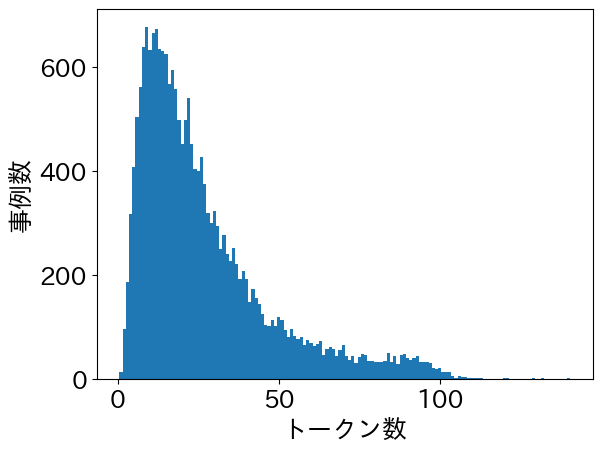

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1608/1608 [00:00<00:00, 1734.82it/s]


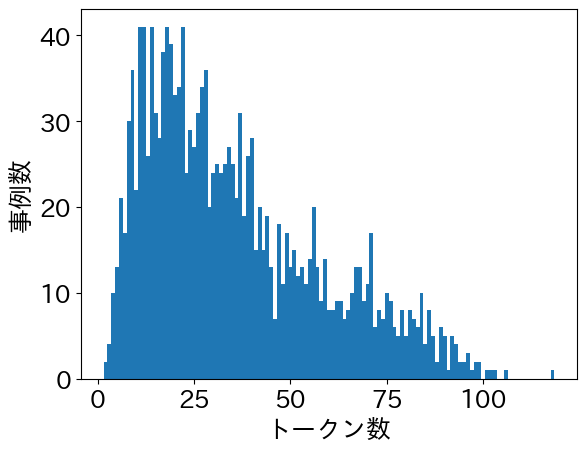

In [33]:
from collections import Counter
import japanize_matplotlib
import matplotlib.pyplot as plt
from datasets import Dataset
from tqdm import tqdm

plt.rcParams["font.size"] = 18  # ÊñáÂ≠ó„Çµ„Ç§„Ç∫„ÇíÂ§ß„Åç„Åè„Åô„Çã

def visualize_text_length(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÅÆ„Éà„Éº„ÇØ„É≥Êï∞„ÅÆÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÅÆÈï∑„Åï„ÇíÊï∞„Åà„Çã
    length_counter = Counter()
    for data in tqdm(dataset):
        length = len(tokenizer.tokenize(data["sentence"]))
        length_counter[length] += 1
    # length_counter„ÅÆÂÄ§„Åã„ÇâÊ£í„Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„Çã
    plt.bar(length_counter.keys(), length_counter.values(), width=1.0)
    plt.xlabel("„Éà„Éº„ÇØ„É≥Êï∞")
    plt.ylabel("‰∫ã‰æãÊï∞")
    plt.show()

visualize_text_length(train_dataset)
visualize_text_length(valid_dataset)

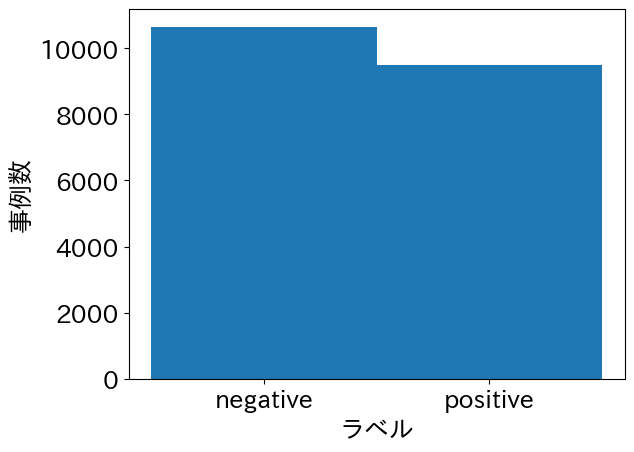

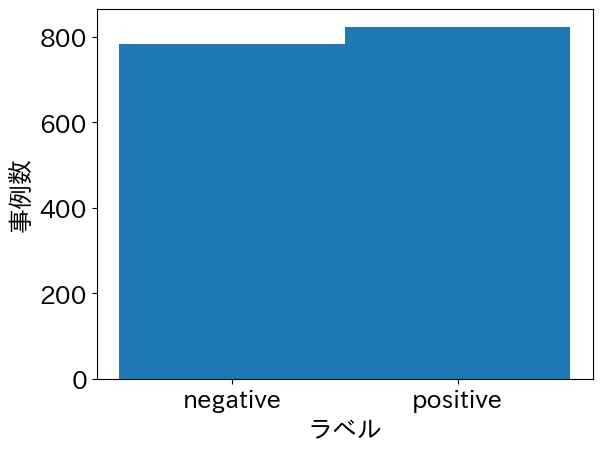

In [34]:
def visualize_labels(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„É©„Éô„É´ÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„É©„Éô„É´„ÅÆÊï∞„ÇíÊï∞„Åà„Çã
    label_counter = Counter()
    for data in dataset:
        label_id = data["label"]
        label_name = dataset.features["label"].names[label_id]
        label_counter[label_name] += 1
    # label_counter„ÇíÊ£í„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª„Åô„Çã
    plt.bar(label_counter.keys(), label_counter.values(), width=1.0)
    plt.xlabel("„É©„Éô„É´")
    plt.ylabel("‰∫ã‰æãÊï∞")
    plt.show()

visualize_labels(train_dataset)
visualize_labels(valid_dataset)

### 5.2.5 „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÂâçÂá¶ÁêÜ

In [35]:
from transformers import BatchEncoding

def preprocess_text_classification(
    example: dict[str, str | int]
) -> BatchEncoding:
    """ÊñáÊõ∏ÂàÜÈ°û„ÅÆ‰∫ã‰æã„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„Çí„Éà„Éº„ÇØ„Éä„Ç§„Ç∫„Åó„ÄÅID„Å´Â§âÊèõ"""
    # encoded_example = tokenizer(example["sentence"], max_length=512)
    encoded_example = tokenizer(example["sentence"], max_length=256)
    # „É¢„Éá„É´„ÅÆÂÖ•ÂäõÂºïÊï∞„Åß„ÅÇ„Çã"labels"„Çí„Ç≠„Éº„Å®„Åó„Å¶Ê†ºÁ¥ç„Åô„Çã
    encoded_example["labels"] = example["label"]
    return encoded_example

In [36]:
encoded_train_dataset = train_dataset.map(
    preprocess_text_classification,
    remove_columns=train_dataset.column_names,
)
encoded_valid_dataset = valid_dataset.map(
    preprocess_text_classification,
    remove_columns=valid_dataset.column_names,
)

Map:   0%|          | 0/20149 [00:00<?, ? examples/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Map:   0%|          | 0/1608 [00:00<?, ? examples/s]

In [37]:
print(encoded_train_dataset[0])

{'input_ids': [2, 478, 7139, 15269, 441, 456, 13123, 21311, 12671, 385, 12651, 7065, 12485, 12488, 13781, 461, 457, 13030, 464, 461, 29, 29, 29, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': 1}


### 5.2.6 „Éü„Éã„Éê„ÉÉ„ÉÅÊßãÁØâ

In [38]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [39]:
batch_inputs = data_collator(encoded_train_dataset[0:4])
pprint({name: tensor.size() for name, tensor in batch_inputs.items()})

{'attention_mask': torch.Size([4, 36]),
 'input_ids': torch.Size([4, 36]),
 'labels': torch.Size([4]),
 'token_type_ids': torch.Size([4, 36])}


### 5.2.7 „É¢„Éá„É´„ÅÆÊ∫ñÂÇô

In [40]:
from transformers import AutoModelForSequenceClassification

class_label = train_dataset.features["label"]
label2id = {label: id for id, label in enumerate(class_label.names)}
id2label = {id: label for id, label in enumerate(class_label.names)}
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=class_label.num_classes,
    label2id=label2id,  # „É©„Éô„É´Âêç„Åã„ÇâID„Å∏„ÅÆÂØæÂøú„ÇíÊåáÂÆö
    id2label=id2label,  # ID„Åã„Çâ„É©„Éô„É´Âêç„Å∏„ÅÆÂØæÂøú„ÇíÊåáÂÆö
)
print(type(model).__name__)

# „Éë„É©„É°„Éº„Çø„Çí„É°„É¢„É™‰∏ä„Å´Èö£Êé•„Åó„ÅüÂΩ¢„ÅßÈÖçÁΩÆ
# „Åì„Çå„ÇíÂÆüË°å„Åó„Å™„ÅÑÂ†¥Âêà„ÄÅ„É¢„Éá„É´„ÅÆ‰øùÂ≠ò„Åß„Ç®„É©„Éº„Å´„Å™„Çã„Åì„Å®„Åå„ÅÇ„Çã
for param in model.parameters():
    param.data = param.data.contiguous()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v3 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification


In [41]:
print(model.forward(**data_collator(encoded_train_dataset[0:4])))

SequenceClassifierOutput(loss=tensor(0.8075, grad_fn=<NllLossBackward0>), logits=tensor([[ 0.2869, -0.2644],
        [ 0.1715,  0.0095],
        [ 0.0040,  0.1524],
        [ 0.2233, -0.2968]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


### 5.2.8 Ë®ìÁ∑¥„ÅÆÂÆüË°å

In [42]:
from transformers import Trainer, TrainingArguments, TrainerCallback
import torch

# ÂÆö‰πâËá™ÂÆö‰πâÂõûË∞ÉÂáΩÊï∞Êù•ÊâìÂç∞Â≠¶‰π†Áéá
class LearningRateLogger(TrainerCallback):
    def __init__(self):
        self.lr_list = []

    def on_step_end(self, args, state, control, optimizer=None, **kwargs):
        # Ëé∑ÂèñÂΩìÂâçÂ≠¶‰π†Áéá
        if optimizer is not None:
            current_lr = optimizer.param_groups[0]['lr']
            # print(f"Step {state.global_step}: Learning Rate = {current_lr:.6f}")
            self.lr_list.append(current_lr)

    def get_lr_list(self):
        return self.lr_list


# ÂàõÂª∫Â≠¶‰π†ÁéáÊó•ÂøóËÆ∞ÂΩïÂô®
lr_logger = LearningRateLogger()

In [43]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="output_wrime",  # ÁµêÊûú„ÅÆ‰øùÂ≠ò„Éï„Ç©„É´„ÉÄ
    per_device_train_batch_size=32,  # Ë®ìÁ∑¥ÊôÇ„ÅÆ„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
    per_device_eval_batch_size=32,  # Ë©ï‰æ°ÊôÇ„ÅÆ„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
    learning_rate=2e-5,  # Â≠¶ÁøíÁéá
    lr_scheduler_type="linear",  # Â≠¶ÁøíÁéá„Çπ„Ç±„Ç∏„É•„Éº„É©„ÅÆÁ®ÆÈ°û
    warmup_ratio=0.1,  # Â≠¶ÁøíÁéá„ÅÆ„Ç¶„Ç©„Éº„É†„Ç¢„ÉÉ„Éó„ÅÆÈï∑„Åï„ÇíÊåáÂÆö
    num_train_epochs=3,  # „Ç®„Éù„ÉÉ„ÇØÊï∞
    save_strategy="epoch",  # „ÉÅ„Çß„ÉÉ„ÇØ„Éù„Ç§„É≥„Éà„ÅÆ‰øùÂ≠ò„Çø„Ç§„Éü„É≥„Ç∞
    logging_strategy="epoch",  # „É≠„ÇÆ„É≥„Ç∞„ÅÆ„Çø„Ç§„Éü„É≥„Ç∞
    evaluation_strategy="epoch",  # Ê§úË®º„Çª„ÉÉ„Éà„Å´„Çà„ÇãË©ï‰æ°„ÅÆ„Çø„Ç§„Éü„É≥„Ç∞
    load_best_model_at_end=True,  # Ë®ìÁ∑¥Âæå„Å´ÈñãÁô∫„Çª„ÉÉ„Éà„ÅßÊúÄËâØ„ÅÆ„É¢„Éá„É´„Çí„É≠„Éº„Éâ
    metric_for_best_model="accuracy",  # ÊúÄËâØ„ÅÆ„É¢„Éá„É´„ÇíÊ±∫ÂÆö„Åô„ÇãË©ï‰æ°ÊåáÊ®ô
    fp16=True,  # Ëá™ÂãïÊ∑∑ÂêàÁ≤æÂ∫¶ÊºîÁÆó„ÅÆÊúâÂäπÂåñ
    report_to="none",  # Â§ñÈÉ®„ÉÑ„Éº„É´„Å∏„ÅÆ„É≠„Ç∞„ÇíÁÑ°ÂäπÂåñ
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [44]:
import numpy as np

def compute_accuracy(
    eval_pred: tuple[np.ndarray, np.ndarray]
) -> dict[str, float]:
    """‰∫àÊ∏¨„É©„Éô„É´„Å®Ê≠£Ëß£„É©„Éô„É´„Åã„ÇâÊ≠£Ëß£Áéá„ÇíË®àÁÆó"""
    predictions, labels = eval_pred
    # predictions„ÅØÂêÑ„É©„Éô„É´„Å´„Å§„ÅÑ„Å¶„ÅÆ„Çπ„Ç≥„Ç¢
    # ÊúÄ„ÇÇ„Çπ„Ç≥„Ç¢„ÅÆÈ´ò„ÅÑ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí‰∫àÊ∏¨„É©„Éô„É´„Å®„Åô„Çã
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions == labels).mean()}

In [45]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    train_dataset=encoded_train_dataset,
    eval_dataset=encoded_valid_dataset,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_accuracy,
    callbacks=[lr_logger],  # Ê∑ªÂä†Ëá™ÂÆö‰πâÂõûË∞É
)
trainer.train()



TrainOutput(global_step=1890, training_loss=0.17538554075533752, metrics={'train_runtime': 342.0104, 'train_samples_per_second': 176.74, 'train_steps_per_second': 5.526, 'total_flos': 2736880683965940.0, 'train_loss': 0.17538554075533752, 'epoch': 3.0})

In [50]:
import pickle
# Ëé∑ÂèñÂπ∂ÊâìÂç∞ÊâÄÊúâÂ≠¶‰π†Áéá
lr_list = lr_logger.get_lr_list()
print("ÂÆåÊï¥ÁöÑÂ≠¶‰π†ÁéáÂàóË°®:", lr_list)
# with open("lr_list.pkl", "wb") as f:
#     pickle.dump(lr_list, f)

# with open("lr_list.pkl", "rb") as f:
#     loaded_lr_list = pickle.load(f)
# print("Âä†ËΩΩÁöÑÂ≠¶‰π†ÁéáÂàóË°®:", loaded_lr_list)

# ËÆ≠ÁªÉÁªìÊùüÂêéÊâìÂç∞‰ºòÂåñÂô®Á±ªÂûã
print(type(trainer.optimizer))
print("‰ΩøÁî®ÁöÑÂ∫ïÂ±Ç‰ºòÂåñÂô®:", type(trainer.optimizer.optimizer))

ÂÆåÊï¥ÁöÑÂ≠¶‰π†ÁéáÂàóË°®: [1.0582010582010582e-07, 2.1164021164021165e-07, 3.174603174603175e-07, 4.232804232804233e-07, 5.291005291005291e-07, 6.34920634920635e-07, 7.407407407407407e-07, 8.465608465608466e-07, 9.523809523809525e-07, 1.0582010582010582e-06, 1.164021164021164e-06, 1.26984126984127e-06, 1.3756613756613758e-06, 1.4814814814814815e-06, 1.5873015873015873e-06, 1.6931216931216932e-06, 1.798941798941799e-06, 1.904761904761905e-06, 2.0105820105820108e-06, 2.1164021164021164e-06, 2.222222222222222e-06, 2.328042328042328e-06, 2.433862433862434e-06, 2.53968253968254e-06, 2.6455026455026455e-06, 2.7513227513227516e-06, 2.8571428571428573e-06, 2.962962962962963e-06, 3.068783068783069e-06, 3.1746031746031746e-06, 3.2804232804232807e-06, 3.3862433862433864e-06, 3.492063492063492e-06, 3.597883597883598e-06, 3.7037037037037037e-06, 3.80952380952381e-06, 3.9153439153439155e-06, 4.0211640211640215e-06, 4.126984126984127e-06, 4.232804232804233e-06, 4.338624338624339e-06, 4.44444444444444

### 5.2.9 Ë®ìÁ∑¥Âæå„ÅÆ„É¢„Éá„É´„ÅÆË©ï‰æ°

In [47]:
# Ê§úË®º„Çª„ÉÉ„Éà„Åß„É¢„Éá„É´„ÇíË©ï‰æ°
eval_metrics = trainer.evaluate(encoded_valid_dataset)
pprint(eval_metrics)

{'epoch': 3.0,
 'eval_accuracy': 0.9415422885572139,
 'eval_loss': 0.1764022707939148,
 'eval_runtime': 2.3791,
 'eval_samples_per_second': 675.873,
 'eval_steps_per_second': 21.436}


### 5.2.10 „É¢„Éá„É´„ÅÆ‰øùÂ≠ò

Google Drive„Å∏„ÅÆ‰øùÂ≠ò

In [ ]:
# Google„Éâ„É©„Ç§„Éñ„Çí„Éû„Ç¶„É≥„Éà„Åô„Çã
from google.colab import drive

drive.mount("drive")

In [ ]:
# ‰øùÂ≠ò„Åï„Çå„Åü„É¢„Éá„É´„ÇíGoogle„Éâ„É©„Ç§„Éñ„ÅÆ„Éï„Ç©„É´„ÉÄ„Å´„Ç≥„Éî„Éº„Åô„Çã
!mkdir -p drive/MyDrive/llm-book
!cp -r output_wrime drive/MyDrive/llm-book

Hugging Face Hub„Å∏„ÅÆ‰øùÂ≠ò

In [ ]:
from huggingface_hub import login

login()

In [ ]:
# Hugging Face Hub„ÅÆ„É™„Éù„Ç∏„Éà„É™Âêç
# "YOUR-ACCOUNT"„ÅØËá™„Çâ„ÅÆ„É¶„Éº„Ç∂Âêç„Å´ÁΩÆ„ÅçÊèõ„Åà„Å¶„Åè„Å†„Åï„ÅÑ
repo_name = "YOUR-ACCOUNT/bert-base-japanese-v3-wrime-sentiment"
# „Éà„Éº„ÇØ„Éä„Ç§„Ç∂„Å®„É¢„Éá„É´„Çí„Ç¢„ÉÉ„Éó„É≠„Éº„Éâ
tokenizer.push_to_hub(repo_name)
model.push_to_hub(repo_name)